### Videos
* [An overview of Acoustics and Speech Science]('https://www.youtube.com/watch?v=uKbprrMRmNU&list=PLRtOjBxJZ7b2eWjRWK0OiKLuk_vLBhCSp&index=3')

### Softwares
* [PRAAT Software]('https://www.youtube.com/watch?v=te6IqQQhp0o')
* [PRAAT Software Manual]('http://web.stanford.edu/dept/linguistics/corpora/material/PRAAT_workshop_manual_v421.pdf')

### Articles
* [Concept on sound]('https://www.techplayon.com/wavelength-frequency-amplitude-phase-defining-waves/')
* [Audio Data Analysis Using Deep Learning with Python (Part 1)]('https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html')

* [Audio Data Analysis Using Deep Learning with Python (Part 2)]('https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-2.html')

### Download Sound and Music
* [Audio Recorder]('https://vocaroo.com/12zMaJxL25u5')
* [freesound]('https://freesound.org/', 'freesound')
* [freemusicloops]('http://www.freemusicloops.co.uk/free-music-samples')

### Books
* [Book : Think DSP]('https://greenteapress.com/wp/think-dsp/')

### Others
* [Pacific Northwest Seismic Network]('https://pnsn.org/")

In [1]:
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt
import librosa.display

%matplotlib inline

[Audio Recording]('https://vocaroo.com/12zMaJxL25u5', 'vocaroo')

In [17]:
import librosa

audio_data = "wav_file_new.wav"
x , sr = librosa.load(audio_data)
print(type(x), type(sr))#<class 'numpy.ndarray'> <class 'int'>print(x.shape, sr)#(94316,) 22050


<class 'numpy.ndarray'> <class 'int'>


#### sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.

In [18]:
# librosa.load(audio_data, sr=44100)

In [19]:
#to disable resampling.

# librosa.load(audio_data, sr=None)

#### Play audio

In [20]:
ipd.Audio(audio_data)

#### Visualizing Audio:

In [6]:
# plt.figure(figsize=(14, 5))
# plt.title("amplitude envelope of a waveform")
# librosa.display.waveplot(x, sr=sr)

#### Spectrogram

In [7]:
# X = librosa.stft(x)
# Xdb = librosa.amplitude_to_db(abs(X))
# plt.figure(figsize=(14, 5))
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
# plt.colorbar()

> The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. Since we see that all action is taking place at the bottom of the spectrum, we can convert the frequency axis to a logarithmic one.

In [8]:
# librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
# plt.colorbar()

### Create an Audio Signal:

In [9]:
import numpy as np
sr = 22050 # sample rate
T = 5.0    # seconds
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x = 0.5*np.sin(2*np.pi*220*t)# pure sine wave at 220 Hz
#Playing the audio
ipd.Audio(x, rate=sr) # load a NumPy array

### Saving the audio

In [10]:
#Saving the audio
#librosa.output.write_wav('tone_220.wav', x, sr) # Deprecated

import soundfile as sf
sf.write('tone_220.wav', x, sr)

### Read saved audio 

In [11]:
# import soundfile as sf
# data, samplerate = sf.read('tone_220.wav')
# ipd.Audio(data, rate=samplerate)

## Feature extraction from Audio signal

> Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. Let us study a few of the features in detail.

- **spectral features** (frequency-based features), which are obtained by converting the time-based signal into the frequency domain using the Fourier Transform, like fundamental frequency, frequency components, 
**spectral centroid**, **spectral flux**, **spectral density**, **spectral roll-off**, etc.

### 1. Spectral Centroid

The spectral centroid indicates at which frequency the energy of a spectrum is centered upon or in other words It indicates where the ” center of mass” for a sound is located. This is like a weighted mean: $f_c = \frac{\sum_kS(k)f(k)}{S(k)}$

* where S(k) is the spectral magnitude at frequency bin k, f(k) is the frequency at bin k.

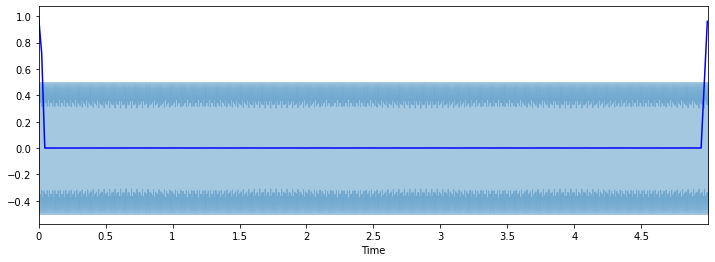

In [12]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape
(775,)
# Computing the time variable for visualization
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

#Plotting the Spectral Centroid along the waveform
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

## 2. Spectral Rolloff

It is a measure of the shape of the signal. It represents the frequency at which high frequencies decline to 0. To obtain it, we have to calculate the fraction of bins in the power spectrum where 85% of its power is at lower frequencies.

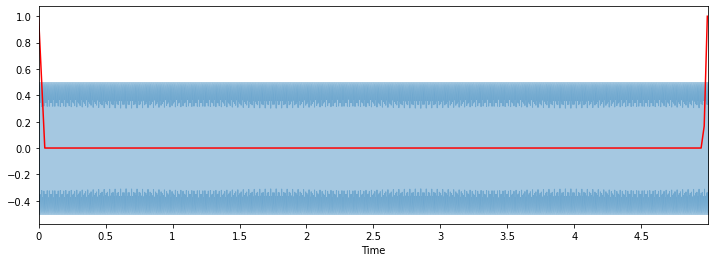

In [13]:
spectral_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

## 3. Spectral Bandwidth

The spectral bandwidth is defined as the width of the band of light at one-half the peak maximum (or full width at half maximum [FWHM]) and is represented by the two vertical red lines and λSB on the wavelength axis.



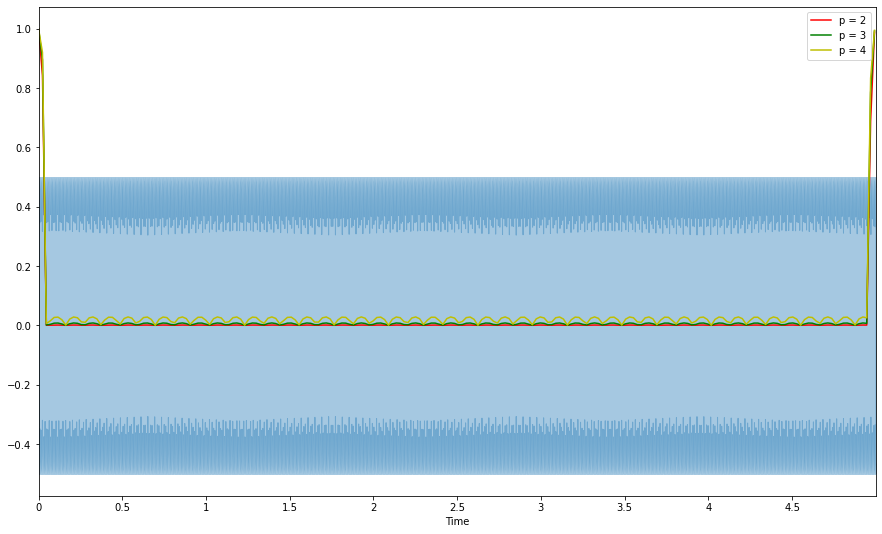

In [14]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

### Videos
* [An overview of Acoustics and Speech Science]('https://www.youtube.com/watch?v=uKbprrMRmNU&list=PLRtOjBxJZ7b2eWjRWK0OiKLuk_vLBhCSp&index=3')

### Softwares
* [PRAAT Software]('https://www.youtube.com/watch?v=te6IqQQhp0o')
* [PRAAT Software Manual]('http://web.stanford.edu/dept/linguistics/corpora/material/PRAAT_workshop_manual_v421.pdf')

### Articles
* [Concept on sound]('https://www.techplayon.com/wavelength-frequency-amplitude-phase-defining-waves/')
* [Audio Data Analysis Using Deep Learning with Python (Part 1)]('https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-1.html')

* [Audio Data Analysis Using Deep Learning with Python (Part 2)]('https://www.kdnuggets.com/2020/02/audio-data-analysis-deep-learning-python-part-2.html')

### Download Sound and Music
* [freesound]('https://freesound.org/', 'freesound')
* [freemusicloops]('http://www.freemusicloops.co.uk/free-music-samples')

### Books
* [Book : Think DSP]('https://greenteapress.com/wp/think-dsp/')

### Others
* [Pacific Northwest Seismic Network]('https://pnsn.org/")